In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin, sqrt

## Exercise 4

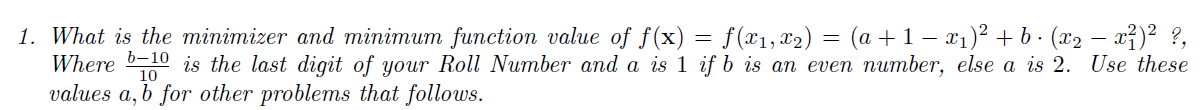

My last digit of roll no. is 4. Hence, $\frac{b-10}{10} = 4 \implies b = 50$

and a is 1 because b is 50

Function becomes $f(x,y) = (2-x)^2 + 50(y-x^2)^2 $

In [2]:
def fex4(x,y):
  return (2-x)**2 + 50*(y-x**2)**2

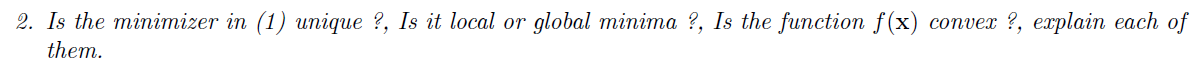

Answer to 2. The minimizer for the function is UNIQUE, because as we see that function is always positive (as it contains squares of both terms). Hence, if minimizer exists, we can see that its minimum is 0. And for it to be 0 we have to make both the terms 0. $(2-x)^2$ is 0 when $x = 2$. Then if $x = 2$ then $y$ has to be $4$ for the whole function to be 0. Hence, $(2, 4) $ is the minimizer. To understand it is global or local, we see that the whole function lies in positive values, hence if 0 is the minimum it has to be global minimum because it is as low as we can go. The function itself is CONVEX, hence a local minima is a global minima. If we see the Hessian of the function:

$\nabla^2f = \begin{bmatrix}
2 - 200(y-3x^2)  \ \ , -200x \\
-200x   \ \ \ \ \ \ \ , \ \ \ \ \ 100
\end{bmatrix}$

For values considered in the range, this matrix is always positive definite. Hence the function is convex in the space.

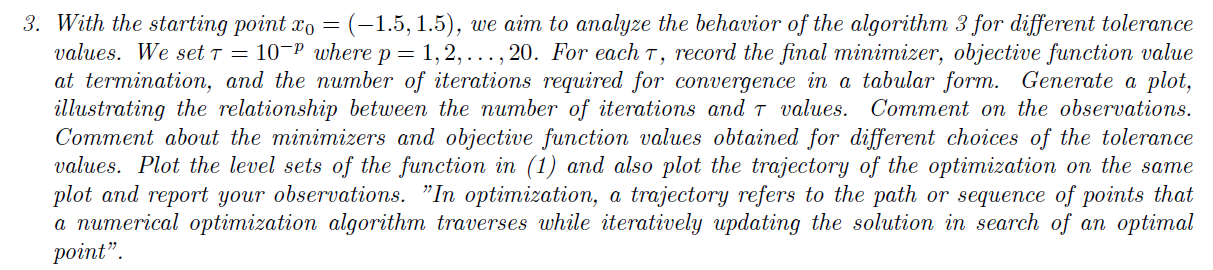

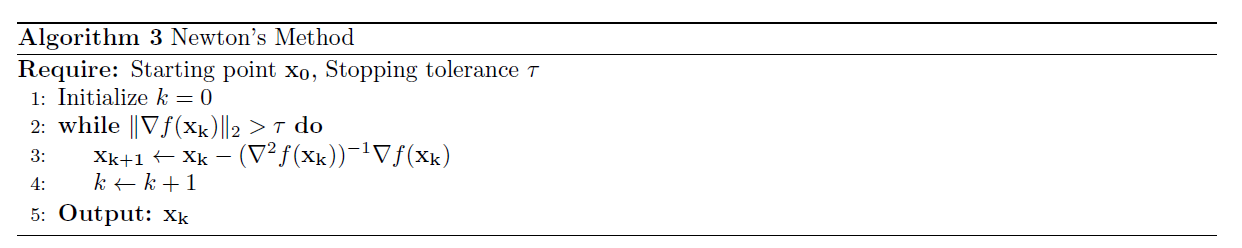

In [13]:
x0 = (-1.5, 1.5)
taus = [10**(-p) for p in range(1,21)]

minimizerstore = []
minimumstore = []
iterationstore = []


from numpy import linalg as l2

def gradf(x,y):
  return np.array([-4+2*x-200*x*(y-x**2), 100*(y-x**2)])

def hessian(x,y):
  return np.array([[2-200*(y-3*x**2), -200*x],[-200*x, 100]])

xk = np.array([0,0])
for tau in taus:
  count = 0
  xk[0] = x0[0]
  xk[1] = x0[1]
  while l2.norm(gradf(xk[0], xk[1])) > tau:
    xk = xk - np.linalg.inv(hessian(xk[0],xk[1]))@gradf(xk[0], xk[1])
    count += 1
  minimizerstore.append(xk)
  minimumstore.append(fex4(xk[0], xk[1]))
  iterationstore.append(count)

In [14]:
print(minimizerstore)

[array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([-1.5,  1.5]), array([2., 4.])]


In [15]:
print(minimumstore)

[1.1519341368489825e-27, 1.0536875143994883e-09, 1.0536875143994883e-09, 1.0536875143994883e-09, 5.551285258765454e-17, 5.551285258765454e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
print(iterationstore)

[2, 5, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [20]:
np.log10(taus)

array([ -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,
       -12., -13., -14., -15., -16., -17., -18., -19., -20.])

([<matplotlib.axis.XTick at 0x7ec2e6be9e70>,
 [Text(-1.0, 0, '−1'),
  Text(-2.0, 0, '−2'),
  Text(-3.0, 0, '−3'),
  Text(-4.0, 0, '−4'),
  Text(-5.0, 0, '−5'),
  Text(-6.0, 0, '−6'),
  Text(-7.0, 0, '−7'),
  Text(-8.0, 0, '−8'),
  Text(-9.0, 0, '−9'),
  Text(-10.0, 0, '−10'),
  Text(-11.0, 0, '−11'),
  Text(-12.0, 0, '−12'),
  Text(-13.0, 0, '−13'),
  Text(-14.0, 0, '−14'),
  Text(-15.0, 0, '−15'),
  Text(-16.0, 0, '−16'),
  Text(-17.0, 0, '−17'),
  Text(-18.0, 0, '−18'),
  Text(-19.0, 0, '−19'),
  Text(-20.0, 0, '−20')])

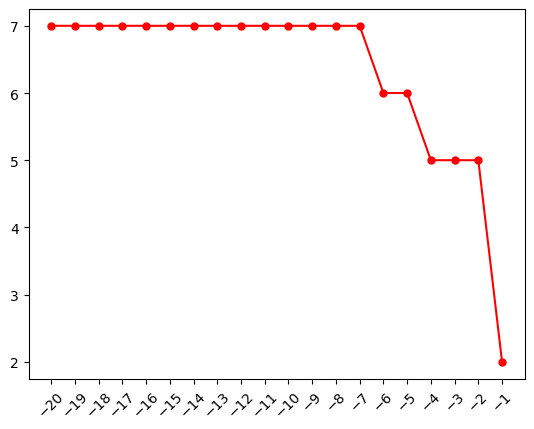

In [25]:
plt.plot(np.log10(taus), iterationstore, marker = 'o', markersize = 5, color = 'red')
plt.xticks([ -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,
       -12., -13., -14., -15., -16., -17., -18., -19., -20.], rotation = 45)

Observations: As we observe that as we reduce tau to smaller values we take more and more iterations to converge in newton's method, thats because the threshold value is decreasing and we need more concrete evidence to stop. Second, observation is that this is much faster than gradient descent, because it directly uses the information from hessian for step size. And runs for even small values of p than other algorithms.

The minimizers as we see, are all 2,4 which is theorotically correct. Also the minimum value is coming close to 0 in all iterations, which is also showed above.

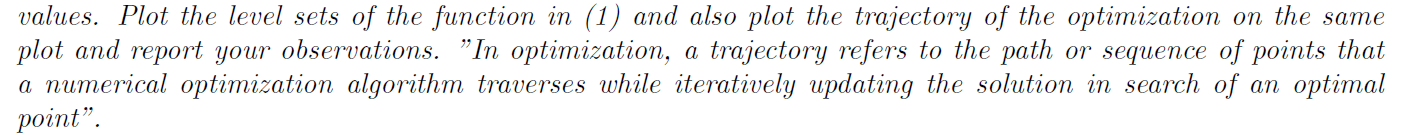

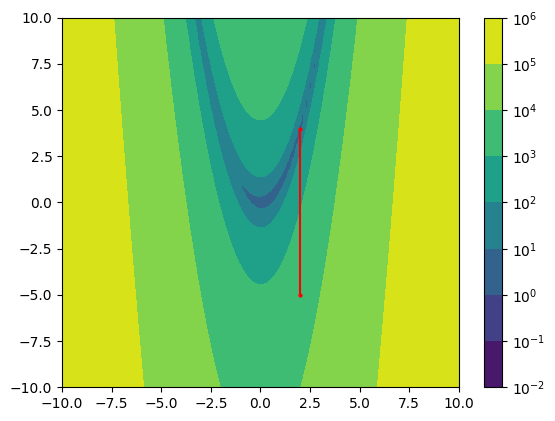

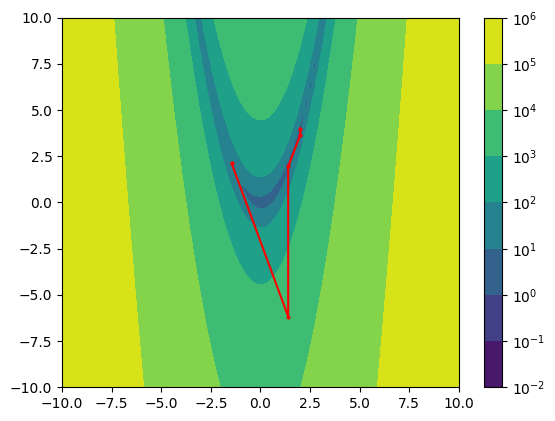

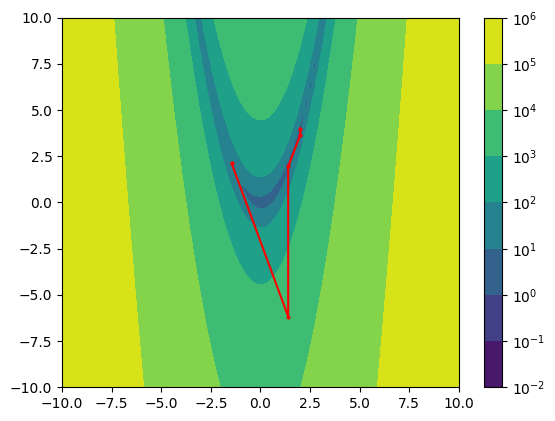

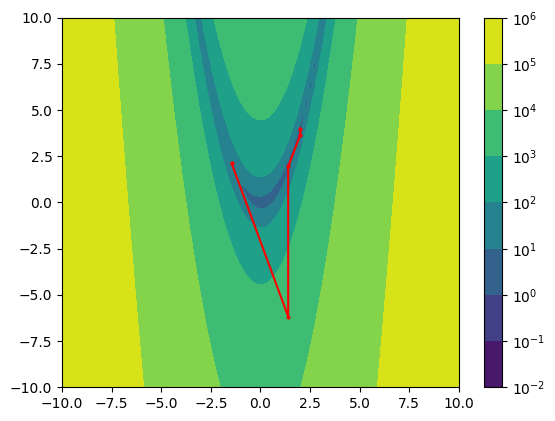

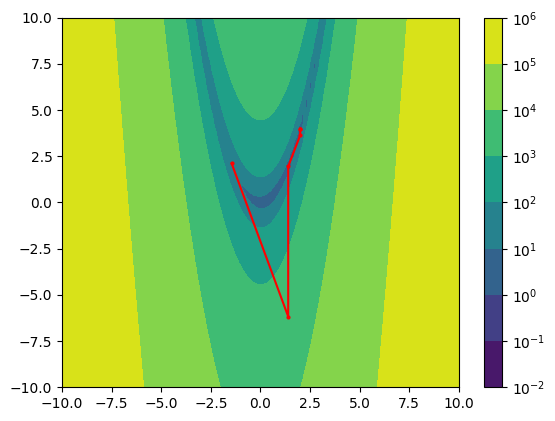

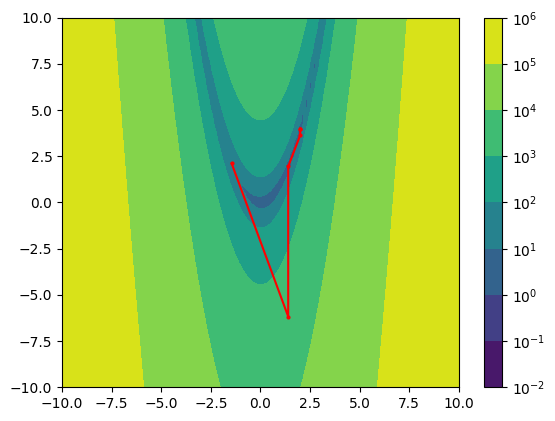

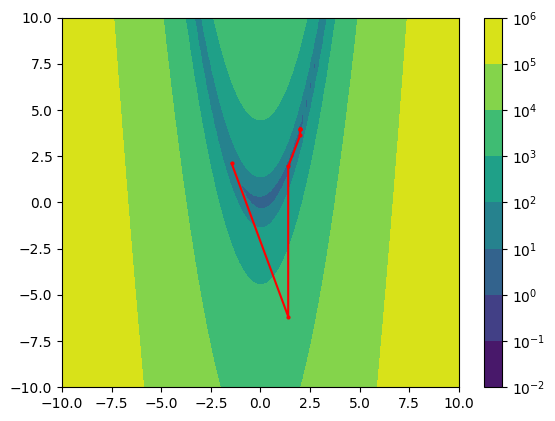

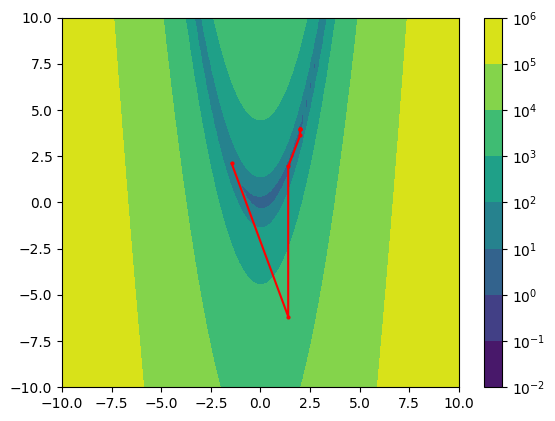

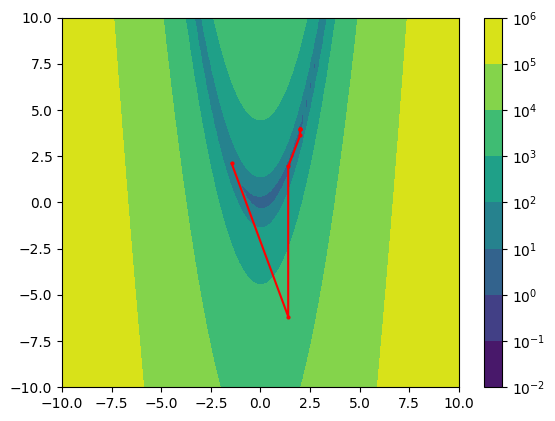

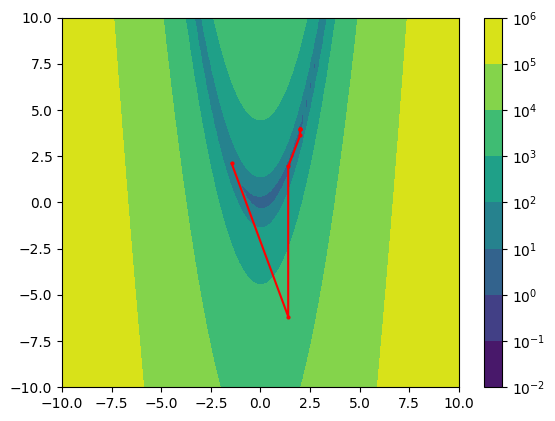

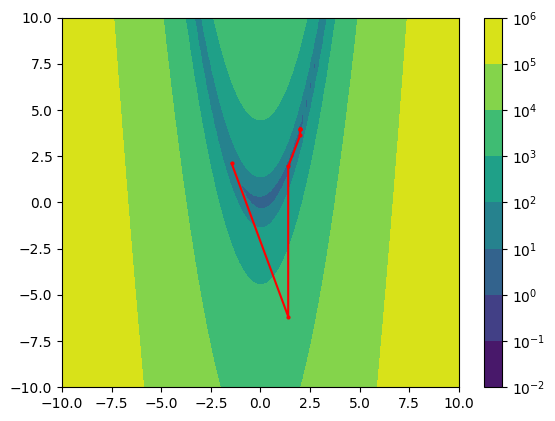

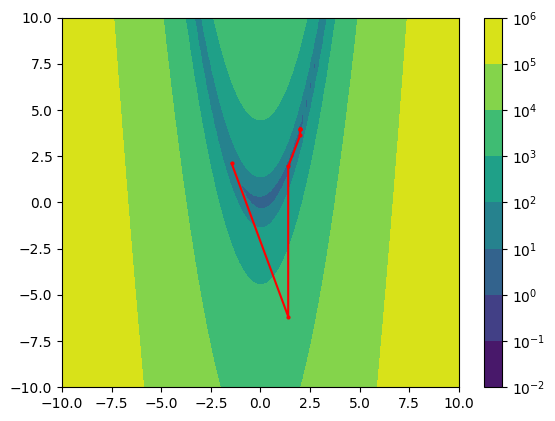

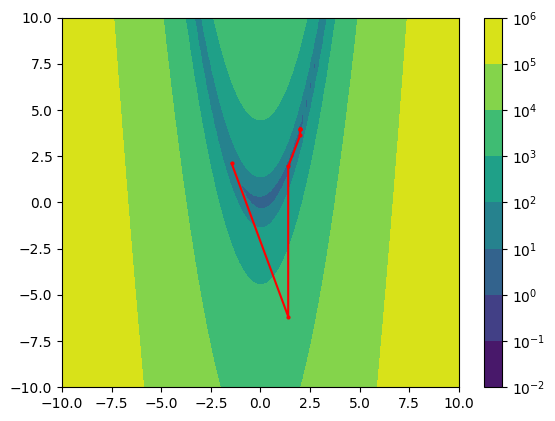

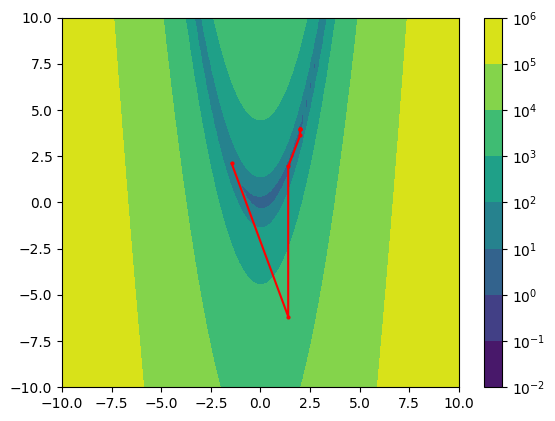

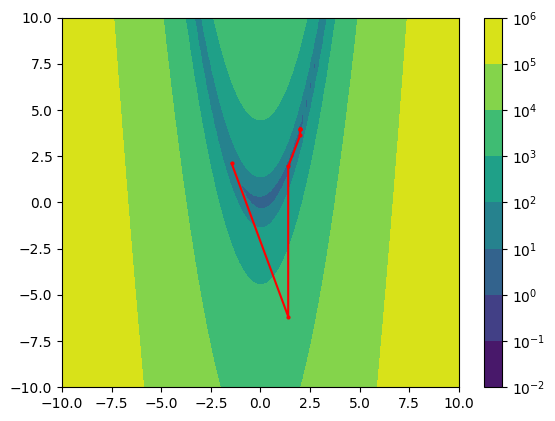

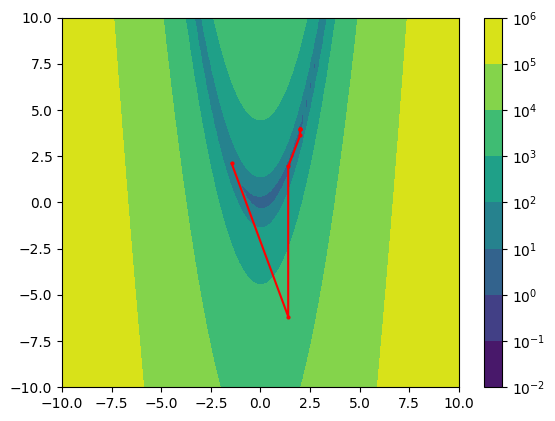

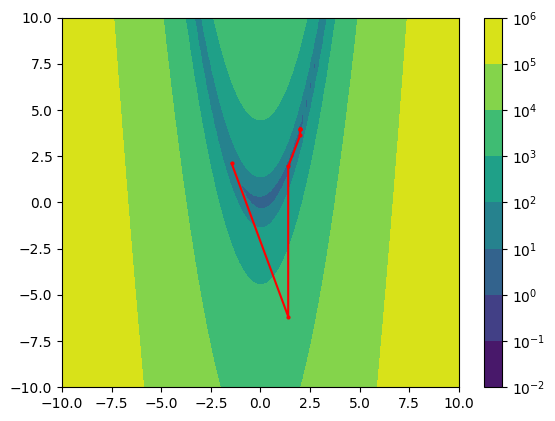

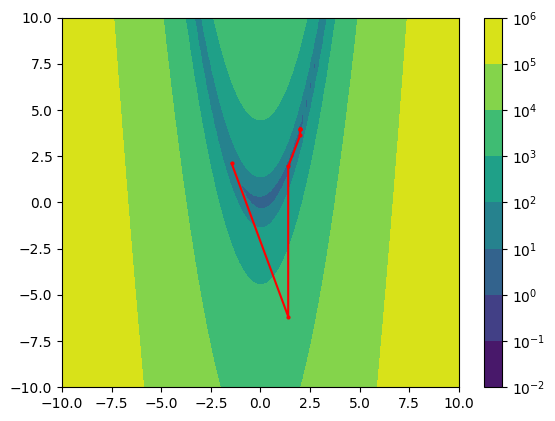

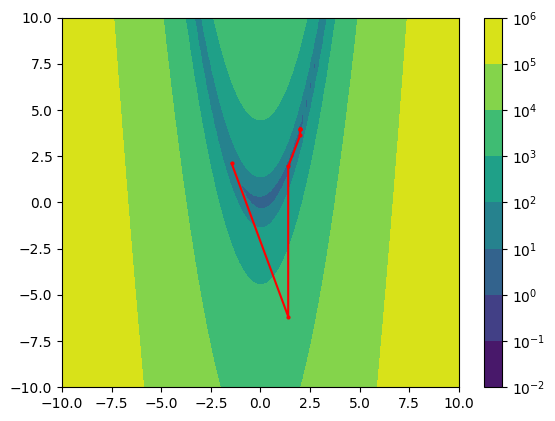

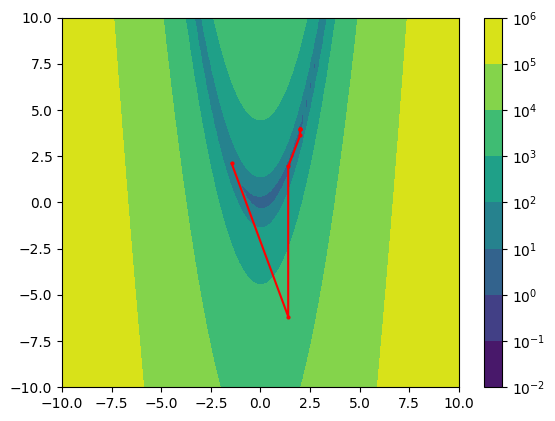

In [33]:
x0 = (-1.5, 1.5)
taus = [10**(-p) for p in range(1,21)]

minimizerstore = []
minimumstore = []
iterationstore = []

n = 100
from numpy import linalg as l2

def gradf(x,y):
  return np.array([-4+2*x-200*x*(y-x**2), 100*(y-x**2)])

def hessian(x,y):
  return np.array([[2-200*(y-3*x**2), -200*x],[-200*x, 100]])

xk = np.array([0,0])
for tau in taus:
  count = 0
  xk[0] = x0[0]
  xk[1] = x0[1]
  x = np.linspace(-10, 10, n)
  y = np.linspace(-10, 10, n)
  X, Y = np.meshgrid(x, y)
  Z = fex4(X,Y)
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  xcordinates = []
  ycordinates = []
  while l2.norm(gradf(xk[0], xk[1])) > tau:
    xk = xk - np.linalg.inv(hessian(xk[0],xk[1]))@gradf(xk[0], xk[1])
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
  plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2)
  plt.show()


Observations: For the trajectory, as we can see that for iterations in range 2 to 7, we are seeing same points respectively. All of the plots are converging to (2,4) which is expected from the code